From the Subjective Value formula, we can calculate new values:
# 
$$
SV = \frac{V}{1 + k\cdot d}
$$
$$
V = SV \cdot (1+ K \cdot d)
$$

Where V is the amount to be gained, d is the delay, SV the subjective value and K the kappa parameter of the hyperbolic discount

In [435]:
import csv
import os
#participant_code = input ("")
path = '/Volumes/UCDN/datasets/SDM/'
participant_code = '23_SDM_0004_N'
print('the Participant Code is ' + participant_code)
#MAC path to the File share
participant_split_dir = os.path.join(path,'split') 
participant_trials = os.path.join(participant_split_dir,'{}/cdd/{}_cdd.csv').format(participant_code,participant_code) #This is the psychopy output CSV.We will use it to retrieve the probabilities and image files. 

#Path to the utility model data
utility_dir = os.path.join(path,'utility')
utility_analysis = os.path.join(utility_dir,'split_CDD_analysis.csv')
#parameters = pd.read_csv(utility_analysis)
amb_options = [0.24, 0.5, 0.74]

print('loading fn: {}'.format(participant_trials))
print('loading fn: {}'.format(utility_analysis))

#Extracting the parameters from participants

#Model parameters
kappa_value = None

# Open the CSV file and read its contents into csv_data
with open(utility_analysis, newline='') as file:
    reader = csv.DictReader(file)
    # Iterate through each row in the CSV
    for row in reader:
        if row['subject'] == participant_code:
            kappa_value = float(row['kappa'])
            break  # Exit the loop once the participant is found

kappa_value = 0.06

the Participant Code is 23_SDM_0004_N
loading fn: /Volumes/UCDN/datasets/SDM/split/23_SDM_0004_N/cdd/23_SDM_0004_N_cdd.csv
loading fn: /Volumes/UCDN/datasets/SDM/utility/split_CDD_analysis.csv


In [436]:
import csv

# Initialize an empty dictionary to store the data
trials_dict = {
    'cdd_immed_amt': [],
    'cdd_immed_wait': [],
    'cdd_delay_amt': [],
    'cdd_delay_wait': []
}

# Read the CSV file
with open(participant_trials, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        # Check if the value is not empty before converting to an integer
        if row['cdd_immed_amt']:
            trials_dict['cdd_immed_amt'].append(int(row['cdd_immed_amt']))
        if row['cdd_immed_wait']:
            trials_dict['cdd_immed_wait'].append(int(row['cdd_immed_wait']))
        if row['cdd_delay_amt']:
            trials_dict['cdd_delay_amt'].append(int(row['cdd_delay_amt']))
        if row['cdd_delay_wait']:
            trials_dict['cdd_delay_wait'].append(int(row['cdd_delay_wait']))

# Print the resulting dictionary
amt_immed_options = list(set(trials_dict['cdd_immed_amt']))
amt_del_options = list(set(trials_dict['cdd_delay_amt']))
time_options = list(set(trials_dict['cdd_delay_wait']))
print(amt_immed_options)
print(amt_del_options)
print(time_options)

import random

# Check if the list is greater than 20 in length
if len(amt_del_options) > 20:
    # Calculate the number of elements to keep (e.g., 20)
    num_to_keep = 20

    # Randomly select indices to keep
    indices_to_keep = random.sample(range(len(amt_del_options)), num_to_keep)

    # Create the updated list with random elements deleted
    del_options = [amt_del_options[i] for i in indices_to_keep]
else:
    del_options = amt_del_options

trials_options = {'cdd_immed_amt': [], #TBD
          'cdd_delay_amt': [v for v in del_options],
          'cdd_delay_wait': [t for t in time_options],
            'delay_SV': [],
            'deltaSV': []}


[25, 10, 2, 20]
[1, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31, 35, 39, 40, 41, 42, 43, 49, 50, 51, 64, 65]
[4, 5, 6, 9, 10, 11, 149, 150, 151, 152, 29, 30, 31, 59, 60, 61, 64, 89, 90, 91]


In [437]:
def add_SV(trials, kappa_value): 
    trials['delay_SV'] = [(v)/(1+kappa_value*D) for v, D 
                          in zip(trials['cdd_delay_amt'], trials['cdd_delay_wait'])]
    trials['deltaSV'] = [svdel - svimmed for  svdel, svimmed in zip(trials['delay_SV'], trials['cdd_immed_amt'])]
    return trials

def get_SE(trials, kappa_value): 
    SE_trials = {}
    SE_trials['category'] = ['SE_trials']*20
    SE_trials['cdd_immed_amt'] = [(v)/(1+kappa_value*D) for v, D 
                          in zip(trials['cdd_delay_amt'], trials['cdd_delay_wait'])]
    SE_trials['cdd_delay_amt'] = [v for v in del_options]
    SE_trials['cdd_delay_wait'] = [t for t in time_options]
    return SE_trials




In [438]:

SE_trials = get_SE(trials_options, kappa_value)
SE_trials = add_SV(SE_trials, kappa_value)
amt_immed_options

[25, 10, 2, 20]

In [439]:

def get_Max_SVdelta (trials):
    Max_SVdelta = trials.copy()
    Max_SVdelta['category'] = ['MaxSV']*20
    Max_SVdelta['cdd_delay_amt'] = [64.0]*len(trials['cdd_delay_amt'])
    Max_SVdelta['cdd_immed_amt'] = [v for v in SE_trials['cdd_immed_amt']]
    return Max_SVdelta 

def get_Min_SVdelta(trials):
    Min_SVdelta = trials.copy()
    Min_SVdelta['category'] = ['MinSV']*20
    Min_SVdelta['cdd_delay_amt'] = [v for v in SE_trials['cdd_immed_amt']]
    Min_SVdelta['cdd_immed_amt'] = [64.0]*len(trials['cdd_delay_amt'])
    return Min_SVdelta


Max_SV_trials = get_Max_SVdelta(trials_options)
Max_SV_trials = add_SV(Max_SV_trials, kappa_value)

Min_SV_trials = get_Min_SVdelta(trials_options)
Min_SV_trials = add_SV(Min_SV_trials, kappa_value)


In [440]:
def dict_merge(dict1,dict2,dict3): 
     '''
     Merge dictionaries while keeping values in lists
     '''
     merged_dict = dict1.copy() # Start with the SE dictionary

     # Update values in dict_1 with values from dict_2
     for key, value in  dict2.items():
        merged_dict[key] = merged_dict[key] + value

     for key, value in dict3.items():
        merged_dict[key] = merged_dict[key] + value
  
     return merged_dict

In [441]:
trials = dict_merge(SE_trials, Max_SV_trials, Min_SV_trials)
trials['cdd_immed_wait'] = [0]*60


In [442]:
len(trials['cdd_immed_wait'])

60

In [443]:
import pandas as pd
# Convert the dictionary to a DataFrame and set 'category' as index
df_trials = pd.DataFrame(trials)
col_order =['category', 'cdd_immed_amt', 'cdd_immed_wait', 'cdd_delay_amt', 'cdd_delay_wait', 'delay_SV', 'deltaSV']
df_trials = df_trials[col_order]
df_trials


,category,cdd_immed_amt,cdd_immed_wait,cdd_delay_amt,cdd_delay_wait,delay_SV,deltaSV
0,SE_trials,7.258065,0,9.000000,4,7.258065,0.000000
1,SE_trials,49.230769,0,64.000000,5,49.230769,0.000000
2,SE_trials,5.147059,0,7.000000,6,5.147059,0.000000
3,SE_trials,18.831169,0,29.000000,9,18.831169,0.000000
4,SE_trials,16.250000,0,26.000000,10,16.250000,0.000000
5,SE_trials,30.722892,0,51.000000,11,30.722892,0.000000
6,SE_trials,4.929577,0,49.000000,149,4.929577,0.000000
7,SE_trials,1.400000,0,14.000000,150,1.400000,0.000000
8,SE_trials,2.286282,0,23.000000,151,2.286282,0.000000
9,SE_trials,6.422925,0,65.000000,152,6.422925,0.000000


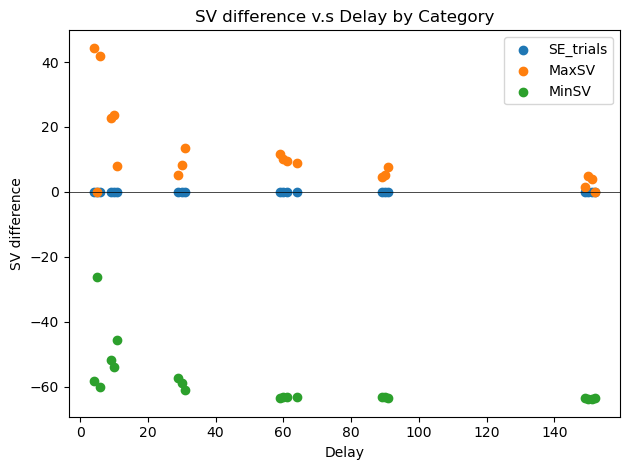

In [444]:
import matplotlib.pyplot as plt

def plot_scatter_by_category(df):
    # Get unique categories and assign a color to each category
    categories = df['category'].unique()
    colors = plt.cm.tab10.colors[:len(categories)]

    # Create a scatter plot for each category with a different color
    for i, category in enumerate(categories):
        category_data = df[df['category'] == category]
        plt.scatter(category_data['cdd_delay_wait'], category_data['deltaSV'], label=category, color=colors[i])

    # Add labels and legend
    plt.xlabel('Delay')
    plt.ylabel('SV difference')
    plt.title('SV difference v.s Delay by Category')
    #plt.axvline(x=70, color='red', linestyle='--', label='xvline=70')
    plt.axhline(y=0, color='black', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot scatter plot with different colors for each category
plot_scatter_by_category(df_trials)



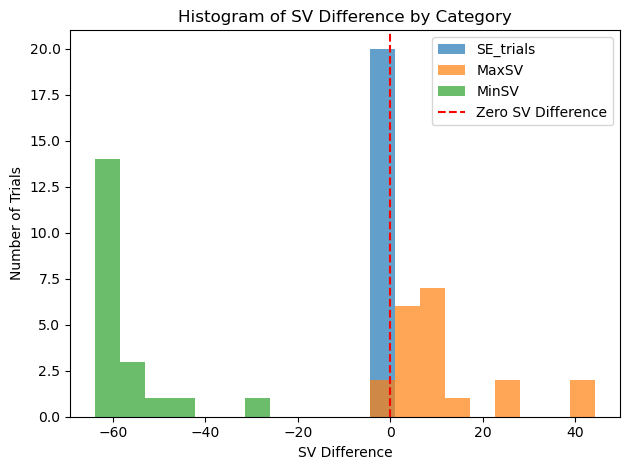

In [445]:
import numpy as np

def plot_histogram_by_category(df):
    # Get unique categories and assign a color to each category
    categories = df['category'].unique()
    colors = plt.cm.tab10.colors[:len(categories)]

    # Determine bin edges
    bin_edges = np.linspace(min(df['deltaSV']), max(df['deltaSV']), 21)  # 20 bins from 0 to maximum deltaSV

    # Create a histogram for SV difference for each category with a different color
    for i, category in enumerate(categories):
        category_data = df[df['category'] == category]
        plt.hist(category_data['deltaSV'], bins=bin_edges, alpha=0.7, label=category, color=colors[i])

    # Add labels and legend
    plt.xlabel('SV Difference')
    plt.ylabel('Number of Trials')
    plt.title('Histogram of SV Difference by Category')
    plt.axvline(x=0, color='red', linestyle='--', label='Zero SV Difference')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot histogram with different colors for each category
plot_histogram_by_category(df_trials)
